In [ ]:
from SAE import SparseAutoencoder, train_sae, device

from sklearn.preprocessing import StandardScaler
import torch

X_dense = adata.X.toarray()
X_scaled = StandardScaler().fit_transform(X_dense)
data_tensor = torch.tensor(X_scaled, dtype=torch.float32)

model = SparseAutoencoder(input_dim=X_scaled.shape[1], latent_dim=128)

trained_model = train_sae(model, data_tensor, epochs=50, l1_weight=1e-4)

Using device: cuda


C:\Users\Laplace\AppData\Roaming\Python\Python313\site-packages\torch\nn\modules\module.py:1341: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\c10/cuda/CUDAAllocatorConfig.h:28.)
  return t.to(


Epoch 1/50, Loss: 1081395562.6390
Epoch 2/50, Loss: 204.5821
Epoch 3/50, Loss: 206.6569
Epoch 4/50, Loss: 206.6741
Epoch 5/50, Loss: 206.7267
Epoch 6/50, Loss: 206.5856
Epoch 7/50, Loss: 206.6571
Epoch 8/50, Loss: 206.4193
Epoch 9/50, Loss: 206.5498
Epoch 10/50, Loss: 206.4440
Epoch 11/50, Loss: 206.5075
Epoch 12/50, Loss: 206.4086
Epoch 13/50, Loss: 206.3062
Epoch 14/50, Loss: 206.2882
Epoch 15/50, Loss: 206.2977
Epoch 16/50, Loss: 206.1906
Epoch 17/50, Loss: 206.1671
Epoch 18/50, Loss: 206.0995
Epoch 19/50, Loss: 206.0735
Epoch 20/50, Loss: 205.9797
Epoch 21/50, Loss: 206.0267
Epoch 22/50, Loss: 206.0094
Epoch 23/50, Loss: 205.7763
Epoch 24/50, Loss: 205.8650
Epoch 25/50, Loss: 205.8213
Epoch 26/50, Loss: 205.6932
Epoch 27/50, Loss: 205.6222
Epoch 28/50, Loss: 205.5831
Epoch 29/50, Loss: 205.5500
Epoch 30/50, Loss: 205.4696
Epoch 31/50, Loss: 205.4815
Epoch 32/50, Loss: 205.3966
Epoch 33/50, Loss: 205.2768
Epoch 34/50, Loss: 205.2876
Epoch 35/50, Loss: 205.2993
Epoch 36/50, Loss: 205

In [ ]:
trained_model.eval()

with torch.no_grad():
    data_tensor = data_tensor.to(device)
    _, latent_all = trained_model(data_tensor)  
    latent_all = latent_all.cpu().numpy()       


In [17]:
model = SparseAutoencoder(input_dim=X_scaled.shape[1], latent_dim=3)
trained_model = train_sae(model, data_tensor, epochs=80, l1_weight=1e-4)

with torch.no_grad():
    _, latent = trained_model(data_tensor.to(device))
    latent_3d = latent.cpu().numpy()

Epoch 1/80, Loss: 49071784.7207
Epoch 2/80, Loss: 1702468.3490
Epoch 3/80, Loss: 77658.8375
Epoch 4/80, Loss: 12179.9555
Epoch 5/80, Loss: 5928.3372
Epoch 6/80, Loss: 3782.5865
Epoch 7/80, Loss: 2619.7982
Epoch 8/80, Loss: 1876.0933
Epoch 9/80, Loss: 1334.3903
Epoch 10/80, Loss: 944.2678
Epoch 11/80, Loss: 700.2213
Epoch 12/80, Loss: 554.9893
Epoch 13/80, Loss: 474.2342
Epoch 14/80, Loss: 415.2583
Epoch 15/80, Loss: 371.3538
Epoch 16/80, Loss: 336.2707
Epoch 17/80, Loss: 304.8627
Epoch 18/80, Loss: 288.2590
Epoch 19/80, Loss: 259.7459
Epoch 20/80, Loss: 238.9993
Epoch 21/80, Loss: 220.4255
Epoch 22/80, Loss: 208.8668
Epoch 23/80, Loss: 194.8183
Epoch 24/80, Loss: 189.6209
Epoch 25/80, Loss: 175.3730
Epoch 26/80, Loss: 166.0672
Epoch 27/80, Loss: 157.4420
Epoch 28/80, Loss: 147.5034
Epoch 29/80, Loss: 139.1171
Epoch 30/80, Loss: 135.1055
Epoch 31/80, Loss: 123.0876
Epoch 32/80, Loss: 113.7484
Epoch 33/80, Loss: 107.8534
Epoch 34/80, Loss: 102.2288
Epoch 35/80, Loss: 98.4995
Epoch 36/80,

In [ ]:
cluster_df = pd.read_csv("data/Parent_NGSC3_DI_PBMC_analysis/analysis/clustering/kmeans_3_clusters/clusters.csv")

print(cluster_df.head())

cluster_df = cluster_df.set_index("Barcode")

adata.obs["kmeans_3"] = adata.obs_names.map(cluster_df["Cluster"])

              Barcode  Cluster
0  AAACCCACATAACTCG-1        2
1  AAACCCACATGTAACC-1        1
2  AAACCCAGTGAGTCAG-1        2
3  AAACCCAGTGCTTATG-1        3
4  AAACGAACAGTCAGTT-1        2


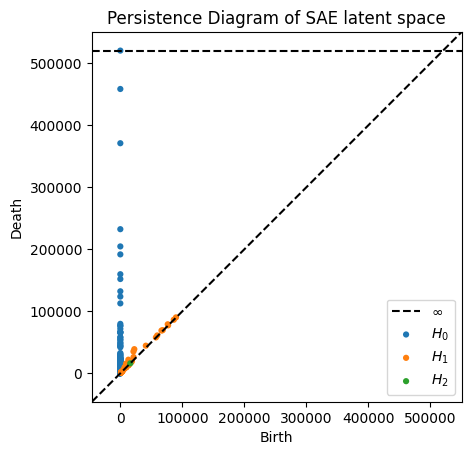

In [ ]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

latent_all = np.load("latent_128.npy")
subset = latent_all[:1000]

result = ripser(subset, maxdim=2)  
diagrams = result['dgms']

plot_diagrams(diagrams, show=True, title="Persistence Diagram of SAE latent space")


In [13]:
from collections import Counter

betti_counts = [len(diag) for diag in diagrams]
print(f"Betti numbers: H0={betti_counts[0]}, H1={betti_counts[1]}, H2={betti_counts[2]}")

Betti numbers: H0=1000, H1=59, H2=1


C:\Users\Laplace\AppData\Roaming\Python\Python313\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


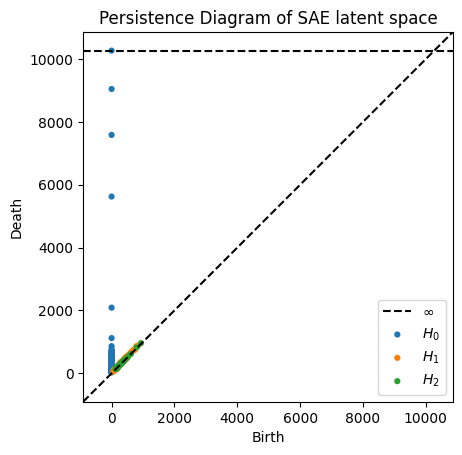

In [ ]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

subset = adata.X[:1000]

result = ripser(subset, maxdim=2)  
diagrams = result['dgms']

plot_diagrams(diagrams, show=True, title="Persistence Diagram of SAE latent space")

In [11]:
betti_counts = [len(diag) for diag in diagrams]
print(f"Betti numbers: H0={betti_counts[0]}, H1={betti_counts[1]}, H2={betti_counts[2]}")

Betti numbers: H0=1000, H1=532, H2=130


In [ ]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from SAE import SparseAutoencoder, train_sae, device  
import os

def run_and_save_latent(adata, latent_dim, save_dir="latent_db"):
    os.makedirs(save_dir, exist_ok=True)

    X_dense = adata.X.toarray()
    X_scaled = StandardScaler().fit_transform(X_dense)
    data_tensor = torch.tensor(X_scaled, dtype=torch.float32)

    model = SparseAutoencoder(input_dim=X_scaled.shape[1], latent_dim=latent_dim)
    trained_model = train_sae(model, data_tensor, epochs=50, l1_weight=1e-4)

    trained_model.eval()
    with torch.no_grad():
        latent_all = trained_model.encoder(data_tensor.to(device)).cpu().numpy()

    save_path = os.path.join(save_dir, f"latent_{latent_dim}.npy")
    np.save(save_path, latent_all)
    print(f"Saved latent to: {save_path}")


Using device: cuda


In [ ]:
dims_to_run = [512]

for dim in dims_to_run:
    run_and_save_latent(adata, latent_dim=dim)


C:\Users\Laplace\AppData\Roaming\Python\Python313\site-packages\torch\nn\modules\module.py:1341: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\c10/cuda/CUDAAllocatorConfig.h:28.)
  return t.to(


Epoch 1/50, Loss: 6861829450.7335
Epoch 2/50, Loss: 230.2385
Epoch 3/50, Loss: 232.8738
Epoch 4/50, Loss: 232.7841
Epoch 5/50, Loss: 232.5531
Epoch 6/50, Loss: 232.5975
Epoch 7/50, Loss: 232.6027
Epoch 8/50, Loss: 232.5683
Epoch 9/50, Loss: 232.6530
Epoch 10/50, Loss: 232.6342
Epoch 11/50, Loss: 232.4886
Epoch 12/50, Loss: 232.6377
Epoch 13/50, Loss: 232.5392
Epoch 14/50, Loss: 232.5989
Epoch 15/50, Loss: 232.6641
Epoch 16/50, Loss: 232.5183
Epoch 17/50, Loss: 232.3603
Epoch 18/50, Loss: 232.4072
Epoch 19/50, Loss: 232.3943
Epoch 20/50, Loss: 232.4917
Epoch 21/50, Loss: 232.3086
Epoch 22/50, Loss: 232.3263
Epoch 23/50, Loss: 232.4947
Epoch 24/50, Loss: 232.2801
Epoch 25/50, Loss: 232.3647
Epoch 26/50, Loss: 232.4162
Epoch 27/50, Loss: 232.2642
Epoch 28/50, Loss: 232.3247
Epoch 29/50, Loss: 232.2906
Epoch 30/50, Loss: 232.2614
Epoch 31/50, Loss: 232.2204
Epoch 32/50, Loss: 232.1545
Epoch 33/50, Loss: 232.1480
Epoch 34/50, Loss: 232.1473
Epoch 35/50, Loss: 232.1903
Epoch 36/50, Loss: 232

In [ ]:
import os
import numpy as np
import pandas as pd
from ripser import ripser
from collections import defaultdict
import matplotlib.pyplot as plt

latent_dims = [512, 256, 128, 64, 32, 16, 8, 4, 2]
latent_dir = "latent_db"

betti_results = defaultdict(dict)

for dim in latent_dims:
    file_path = os.path.join(latent_dir, f"latent_{dim}.npy")
    if os.path.exists(file_path):
        latent = np.load(file_path)
        subset = latent[:1000]  
        result = ripser(subset, maxdim=2)
        diagrams = result['dgms']
        betti_counts = [len(dgm) for dgm in diagrams]
        betti_results[dim] = {
            "H0": betti_counts[0] if len(betti_counts) > 0 else 0,
            "H1": betti_counts[1] if len(betti_counts) > 1 else 0,
            "H2": betti_counts[2] if len(betti_counts) > 2 else 0,
        }
    else:
        print(f"文件不存在: {file_path}")

df_betti = pd.DataFrame.from_dict(betti_results, orient="index")
df_betti = df_betti.sort_index()
display(df_betti)

,H0,H1,H2
2,1000,231,2
4,1000,344,34
8,1000,253,18
16,1000,102,2
32,1000,126,3
64,1000,154,5
128,1000,88,1
256,1000,46,2
512,1000,56,0


C:\Users\Laplace\AppData\Roaming\Python\Python313\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Laplace\AppData\Roaming\Python\Python313\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Laplace\AppData\Roaming\Python\Python313\site-packages\ripser\ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


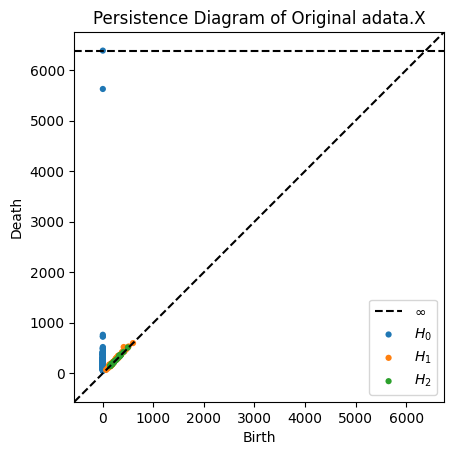

Betti numbers of adata.X: H0=500, H1=218, H2=48


In [ ]:
import scanpy as sc
from ripser import ripser
from persim import plot_diagrams
import numpy as np

adata = sc.read_10x_h5("data/Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()

subset = adata.X[:500].toarray()

result = ripser(subset, maxdim=2)
diagrams = result['dgms']

plot_diagrams(diagrams, show=True, title="Persistence Diagram of Original adata.X")

betti_counts = [len(diag) for diag in diagrams]
print(f"Betti numbers of adata.X: H0={betti_counts[0]}, H1={betti_counts[1]}, H2={betti_counts[2]}")


In [9]:
adata.var


,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38
AC023491.2,ENSG00000278633,Gene Expression,GRCh38
AC007325.1,ENSG00000276017,Gene Expression,GRCh38
AC007325.4,ENSG00000278817,Gene Expression,GRCh38


discrete_morse_skeleton

In [ ]:
import numpy as np
from dm_yw import yw_morse_skeleton
from dm_full import visualize_graph3d   

theta = np.linspace(0, 6*np.pi, 2000)
x, y = np.cos(theta), np.sin(theta)
z = np.linspace(-6, 6, 2000)
pts = np.c_[x, y, z] + 0.02 * np.random.randn(2000, 3)




In [2]:
from dm_full import discrete_morse_graph, visualize_graph3d
G = discrete_morse_graph(pts, grid_res=128, sigma=2.0, visualize=False)
fig = visualize_graph3d(G, pts)
fig.show()


In [ ]:
import numpy as np
from dm_yw import yw_morse_skeleton
from dm_full import visualize_graph3d 

n = 2000
theta = np.random.rand(n) * 2 * np.pi
r = 0.3 + 0.02 * np.random.randn(n)
x = 0.5 + r * np.cos(theta)
y = 0.5 + r * np.sin(theta)

for angle in np.linspace(0, 2 * np.pi, 10, endpoint=False):
    x = np.append(x, 0.5 + np.linspace(0, 0.3, 100) * np.cos(angle))
    y = np.append(y, 0.5 + np.linspace(0, 0.3, 100) * np.sin(angle))

pts = np.stack([x, y], axis=1)

In [2]:
pts

array([[0.24066881, 0.6816959 ],
       [0.57017652, 0.24743943],
       [0.70771471, 0.73702945],
       ...,
       [0.73780197, 0.32722676],
       [0.74025353, 0.32544559],
       [0.7427051 , 0.32366442]])

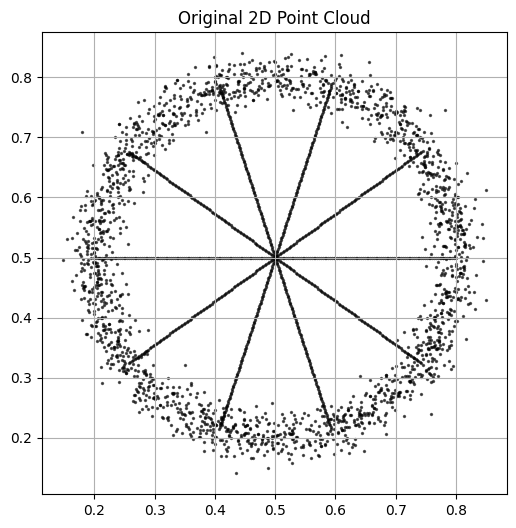

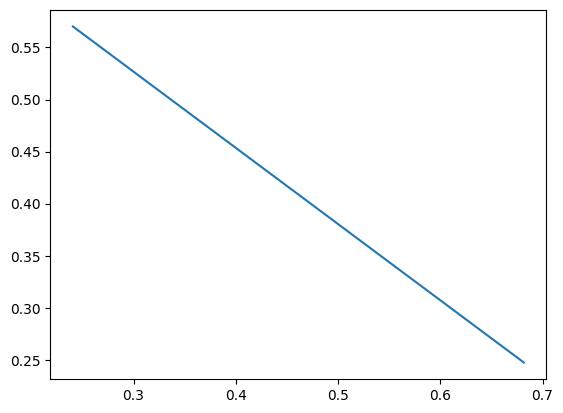

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
plt.scatter(pts[:, 0], pts[:, 1], s=2, c="black", alpha=0.6)
plt.title("Original 2D Point Cloud")
plt.axis("equal")
plt.grid(True)
plt.show()
plt.plot(pts[0], pts[1])

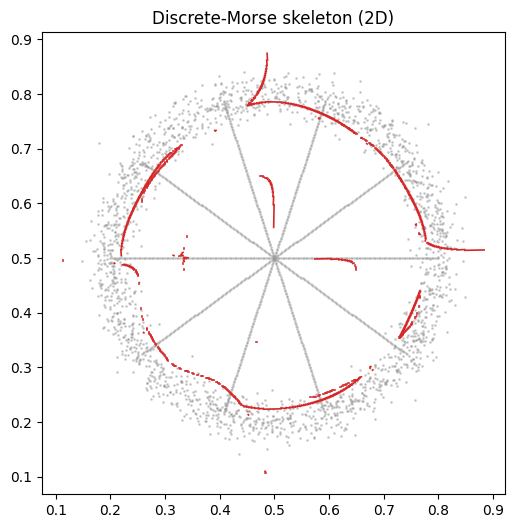

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from dm_full import discrete_morse_graph, visualize_graph2d
G = discrete_morse_graph(pts, grid_res=1024, sigma=100, visualize=False)

visualize_graph2d(G, pts)
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from dm_full import discrete_morse_graph, visualize_graph2d

X_lat = np.load("latent_db/latent_8.npy") 

pca = PCA(n_components=2, whiten=False, random_state=0)
pts2d = pca.fit_transform(X_lat)             

pts_min = pts2d.min(0)
pts_span = pts2d.max(0) - pts_min
pts_norm = (pts2d - pts_min) / pts_span     

pts2d.shape

(10194, 2)

Skeleton: 563 nodes, 286 edges


<Axes: title={'center': 'Discrete-Morse skeleton (2D)'}>

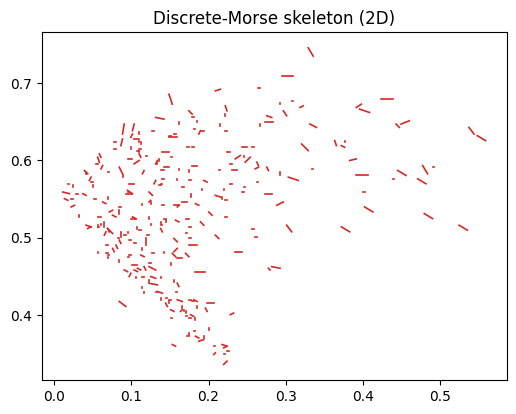

In [ ]:
from dm_full import discrete_morse_graph, visualize_graph2d
G = discrete_morse_graph(
        pts_norm,
        grid_res = 512,
        sigma    = 1,
        pers_len = 0.001, 
        pers_rho = 0.0001,
        visualize=False)

print(f"Skeleton: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
visualize_graph2d(G)  
